In [102]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import piecewise_regression as pwr

# Read File

In [8]:
gdf = gpd.read_file("clean_data.geojson")

In [9]:
gdf.head()

,County,State,Median Rent 2015,Median Rent 2023,Housing Units 2014,Population 2014,Net Migration 2015,Housing Units 2022,Population 2022,Net Migration 2023,Permits 2014,Single Family Permits 2014,Multifamily Permits 2014,Permits 2022,Single Family Permits 2022,Multifamily Permits 2022,Singe Family Permits 2014,Singe Family Permits 2022,geometry
0,LosAngeles,CA,1778.81,2740.42,12740,154071,-938,3642047,9719765,-78649,17659,4586.0,13073,26572,8253.0,18319,4586,8253,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
1,Cook,IL,1478.57,1921.00,7342,135435,2058,7538,17409,321,7753,1476.0,6277,8326,1052.0,7274,1476,1052,"POLYGON ((-83.57486 31.07813, -83.50996 31.205..."
2,Harris,TX,1203.14,1565.70,13758,25419,80,14738,36257,429,40060,18533.0,21527,38787,18156.0,20631,18533,18156,"POLYGON ((-95.84474 30.08891, -95.80333 30.090..."
3,Maricopa,AZ,954.61,1812.31,16237,202985,2145,1877620,4555833,17396,18597,9836.0,8761,40104,20608.0,19496,9836,20608,"POLYGON ((-113.33392 33.37742, -113.33333 33.5..."
4,SanDiego,CA,1680.15,2842.02,708284,850424,9289,1247318,3277176,-19978,6875,2487.0,4388,9346,3517.0,5829,2487,3517,"POLYGON ((-117.59619 33.38696, -117.57848 33.4..."


# Exploratory Analysis

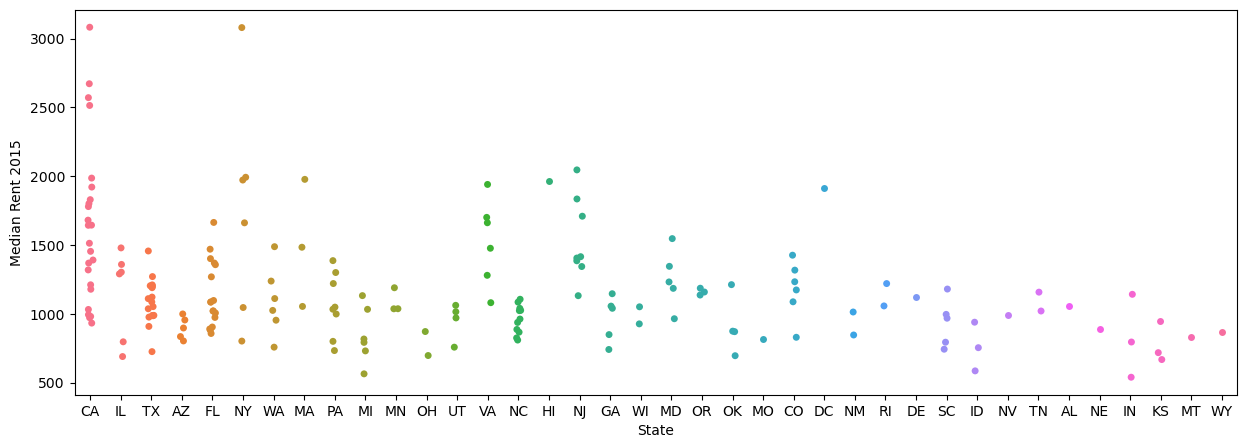

In [13]:
plt.figure(figsize=(15, 5))
sns.stripplot(data = gdf, x = 'State', y = 'Median Rent 2015', hue = 'State')
plt.savefig('median_rent2015.jpg')

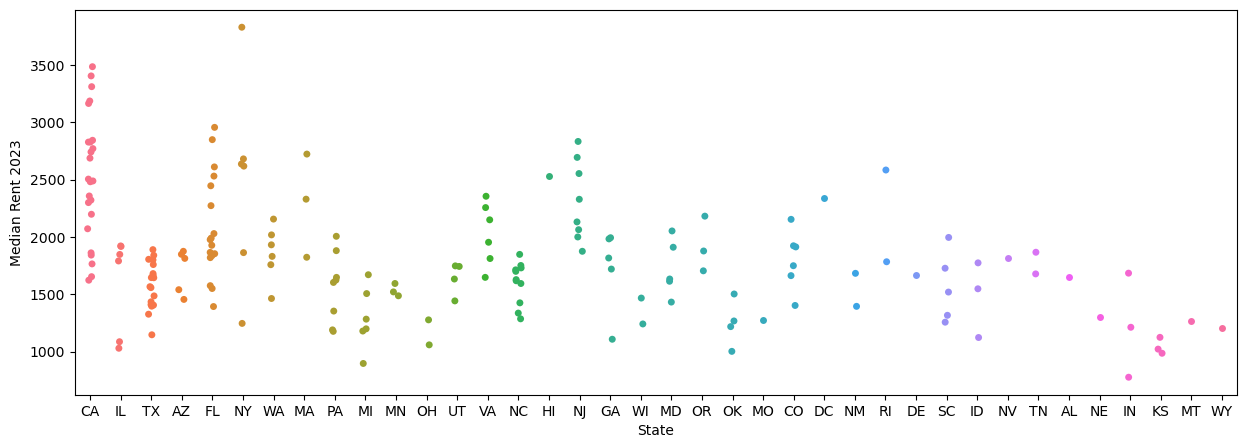

In [14]:
plt.figure(figsize=(15, 5))
sns.stripplot(data = gdf, x = 'State', y = 'Median Rent 2023', hue = 'State')
plt.savefig('median_rent2023.jpg')

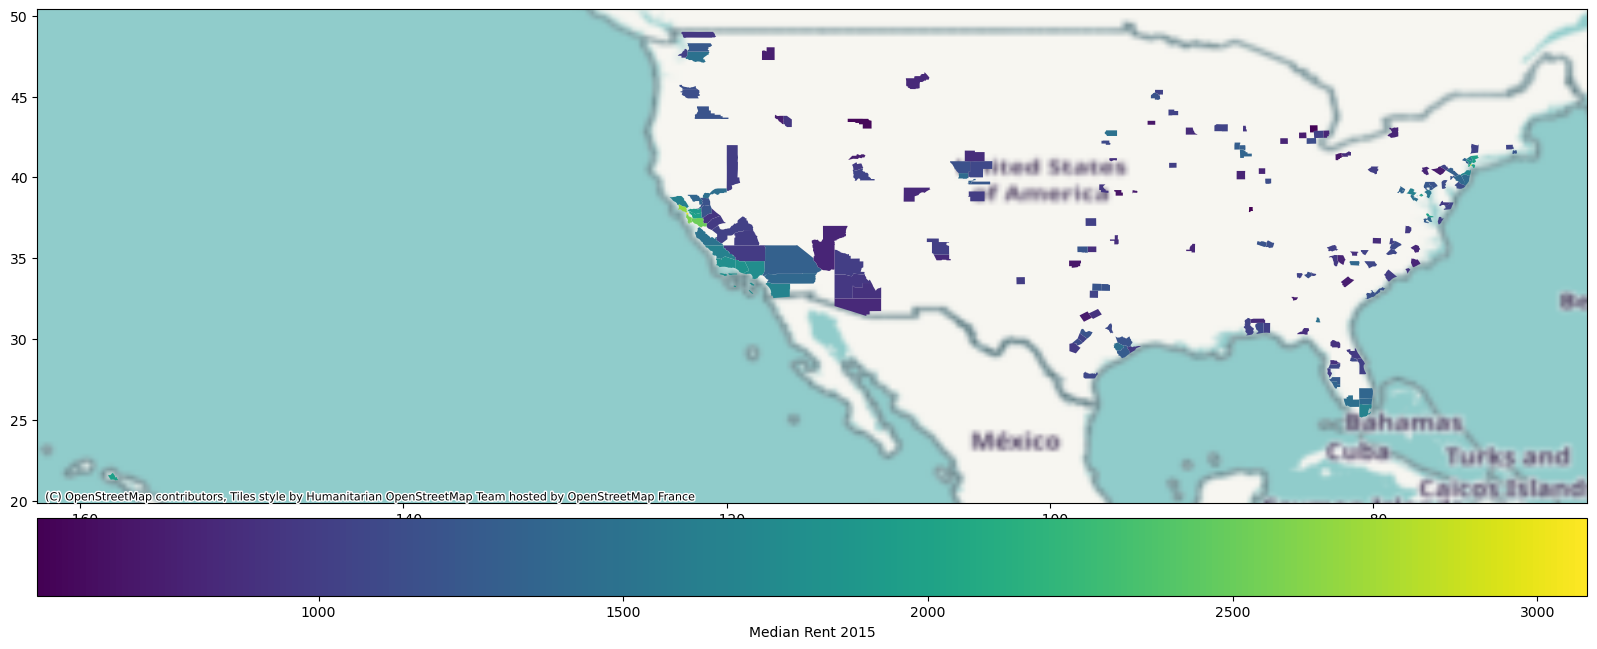

In [23]:
ax = gdf.plot(column='Median Rent 2015', figsize=(20, 10))
cx.add_basemap(ax, crs = 4326)
cbar = plt.colorbar(ax.get_children()[0], ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Median Rent 2015')
plt.savefig('median_rent2015map.jpg')

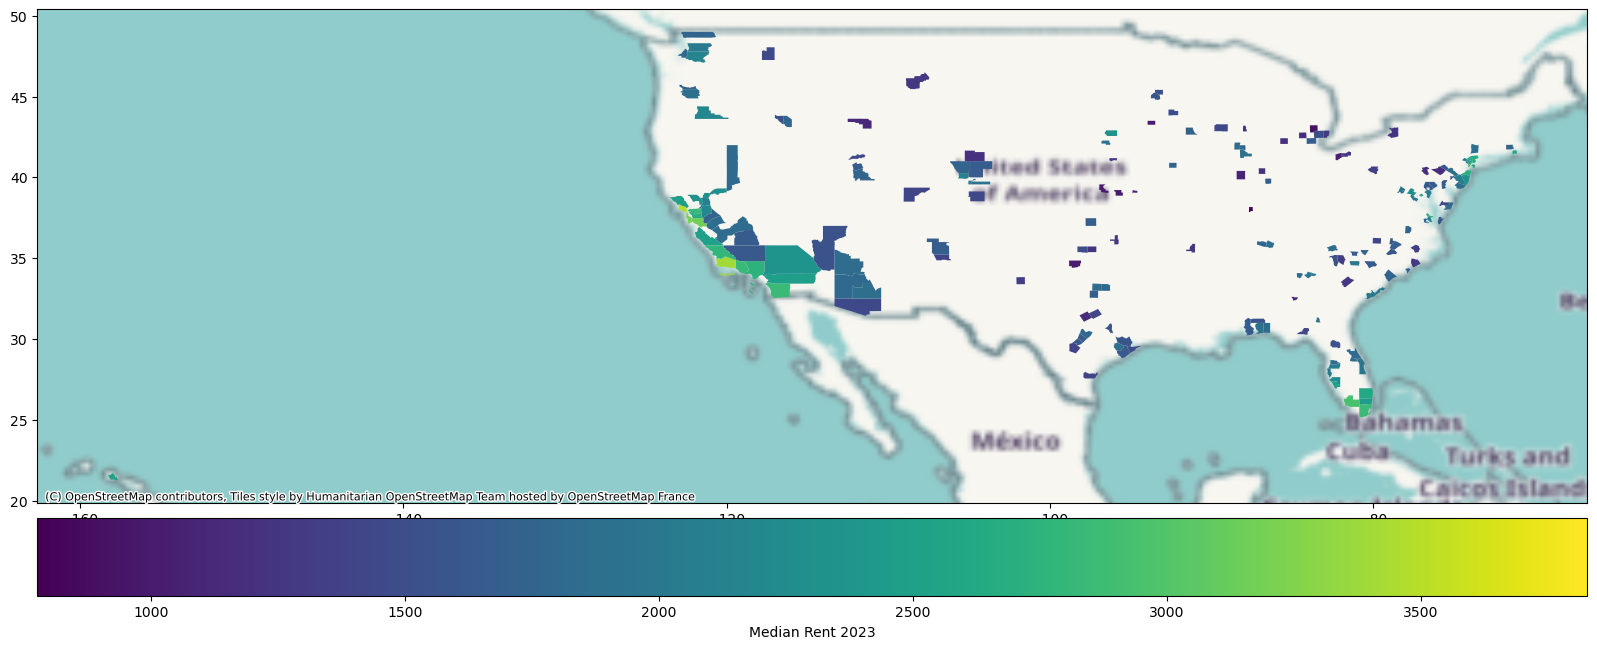

In [24]:
ax = gdf.plot(column='Median Rent 2023', figsize=(20, 10))
cx.add_basemap(ax, crs = 4326)
cbar = plt.colorbar(ax.get_children()[0], ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Median Rent 2023')
plt.savefig('median_rent2023map.jpg')

In [28]:
state_median_rent_2015 = gdf.groupby('State')['Median Rent 2015'].median().reset_index()
state_housingunits_2014 = gdf.groupby('State')['Housing Units 2014'].median().reset_index()
state_population_2014 = gdf.groupby('State')['Population 2014'].median().reset_index()
state_permits_2014 = gdf.groupby('State')['Permits 2014'].median().reset_index()

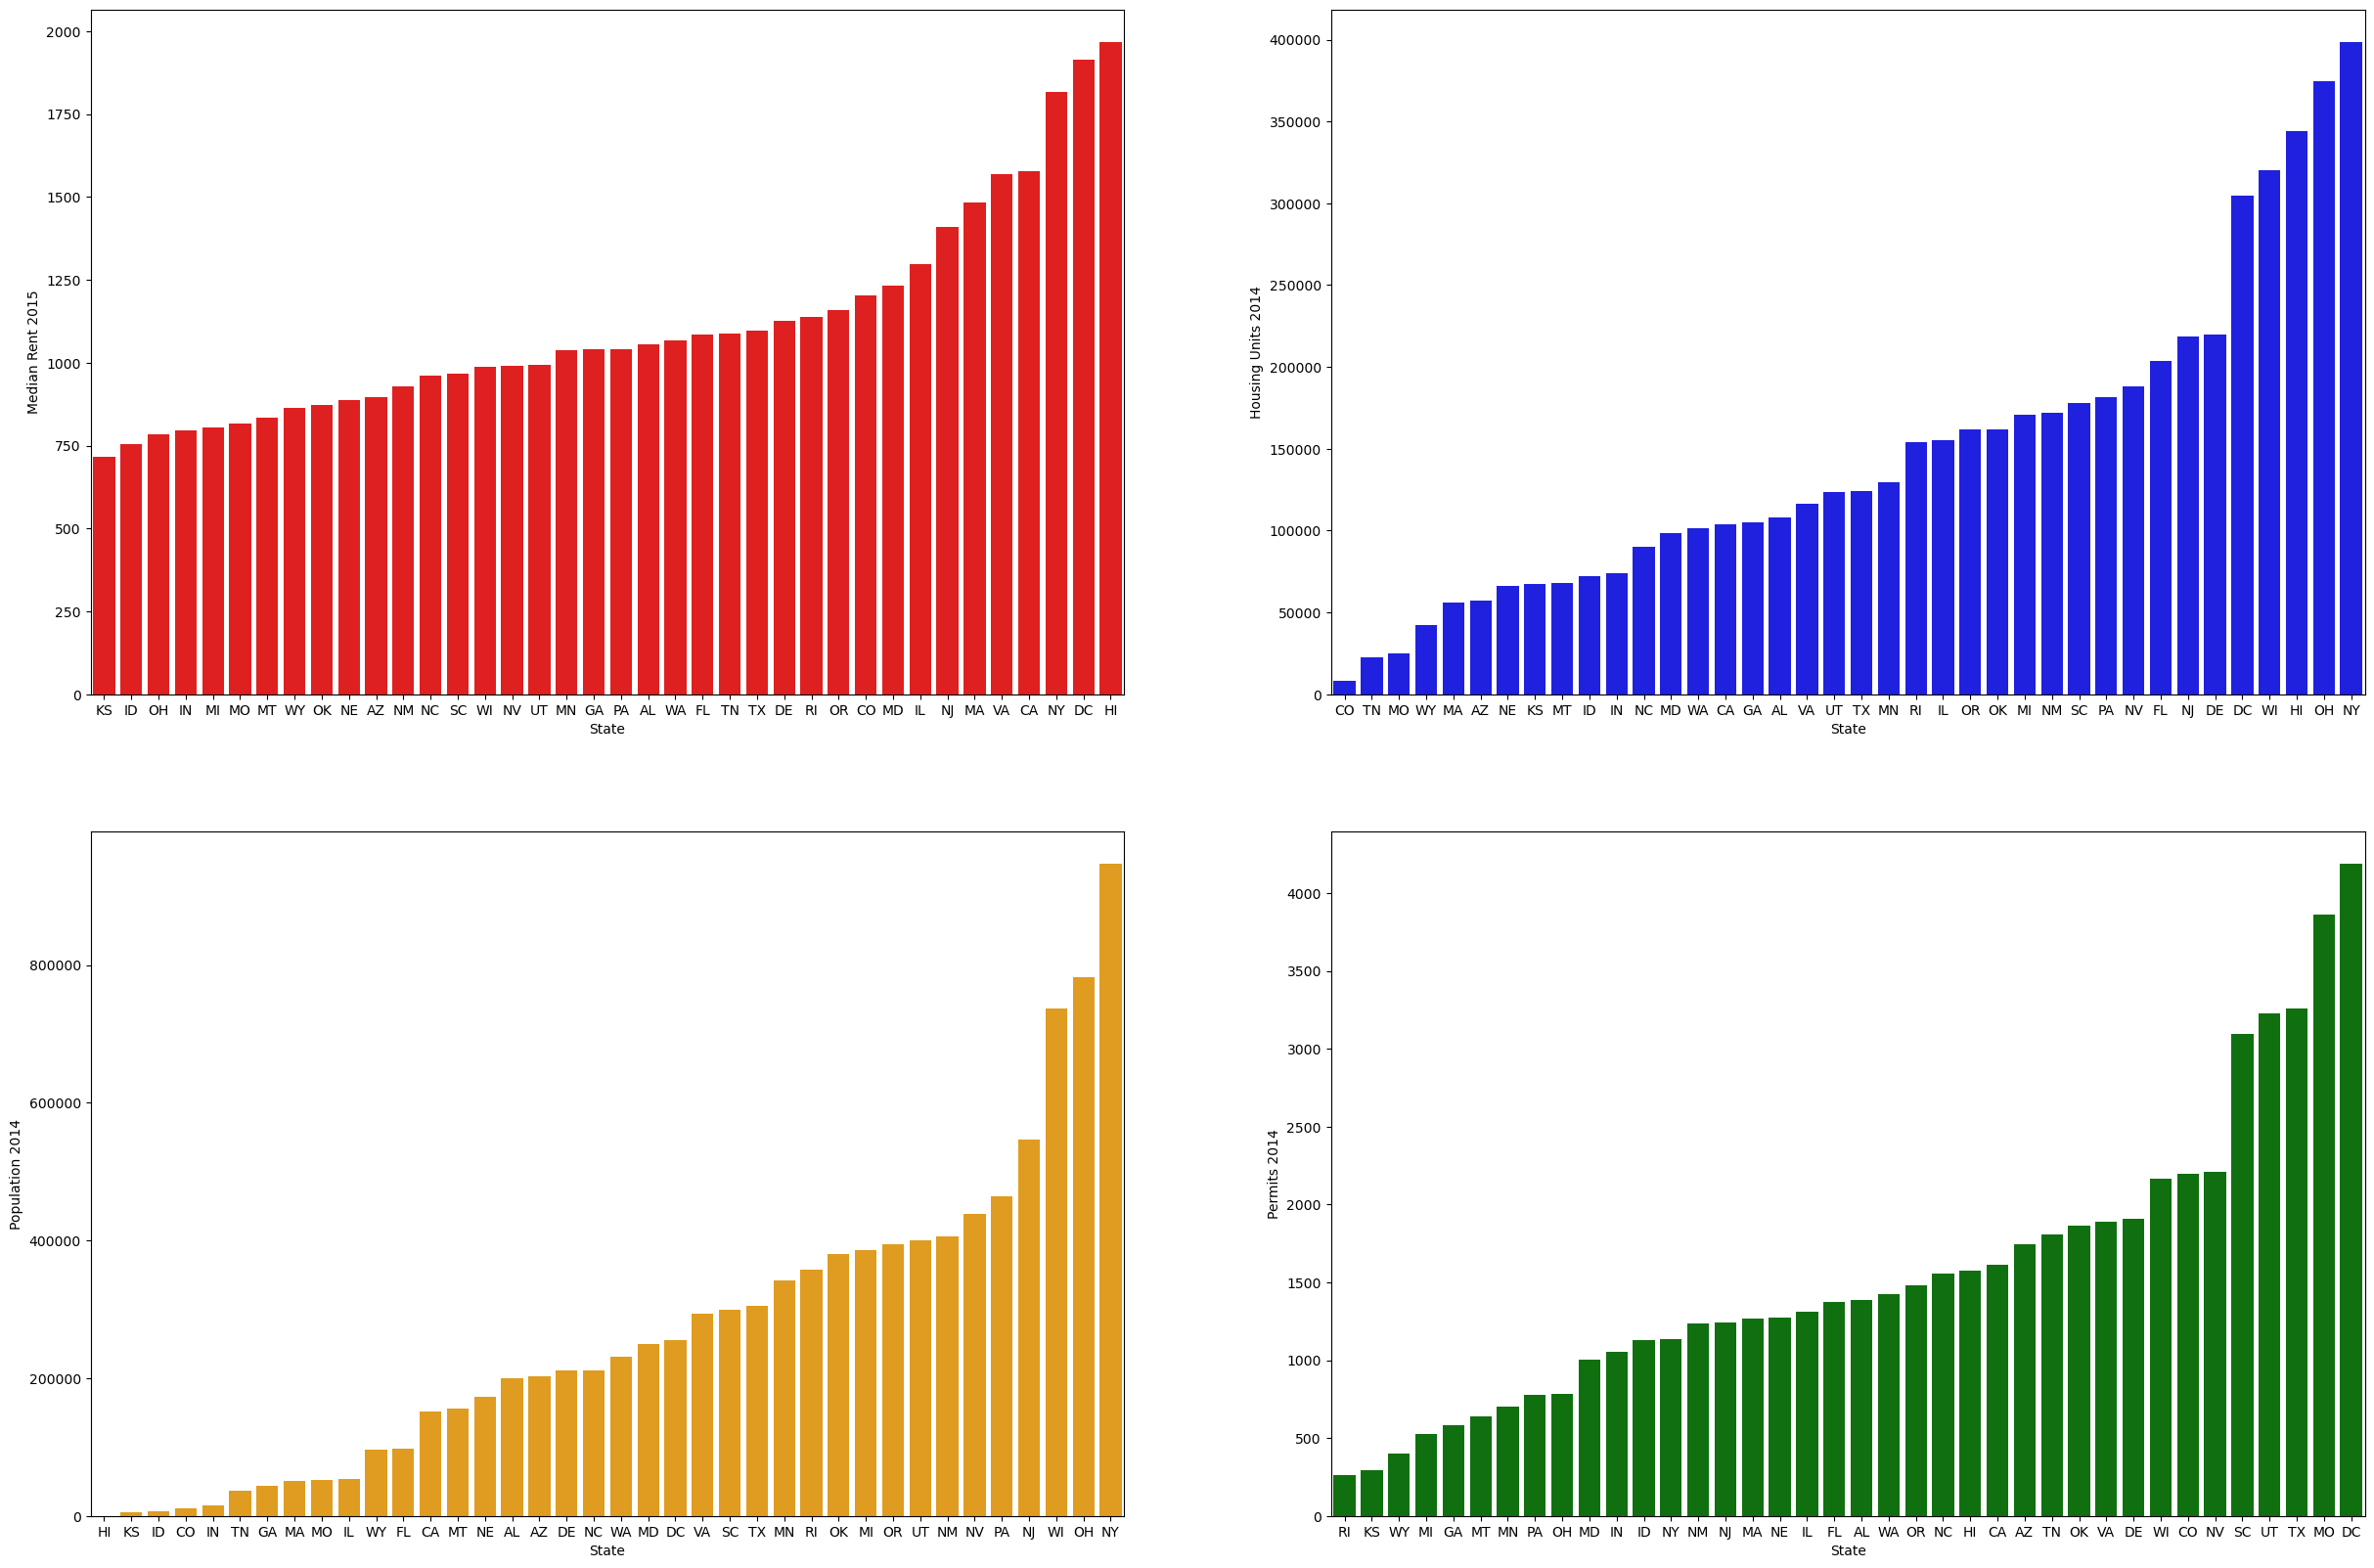

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))
sns.barplot(data=state_median_rent_2015, x='State', y='Median Rent 2015', color='red', ax=ax1, order=state_median_rent_2015.sort_values('Median Rent 2015')['State'])
sns.barplot(data=state_housingunits_2014, x='State', y='Housing Units 2014', color='blue', ax=ax2, order=state_housingunits_2014.sort_values('Housing Units 2014')['State'])
sns.barplot(data=state_population_2014, x='State', y='Population 2014', color='orange', ax=ax3, order=state_population_2014.sort_values('Population 2014')['State'])
sns.barplot(data=state_permits_2014, x='State', y='Permits 2014', color='green', ax=ax4, order=state_permits_2014.sort_values('Permits 2014')['State'])
plt.savefig('2014comparison.jpg')

In [43]:
state_median_rent_2023 = gdf.groupby('State')['Median Rent 2023'].median().reset_index()
state_housingunits_2022 = gdf.groupby('State')['Housing Units 2022'].median().reset_index()
state_population_2022 = gdf.groupby('State')['Population 2022'].median().reset_index()
state_permits_2022 = gdf.groupby('State')['Permits 2022'].median().reset_index()

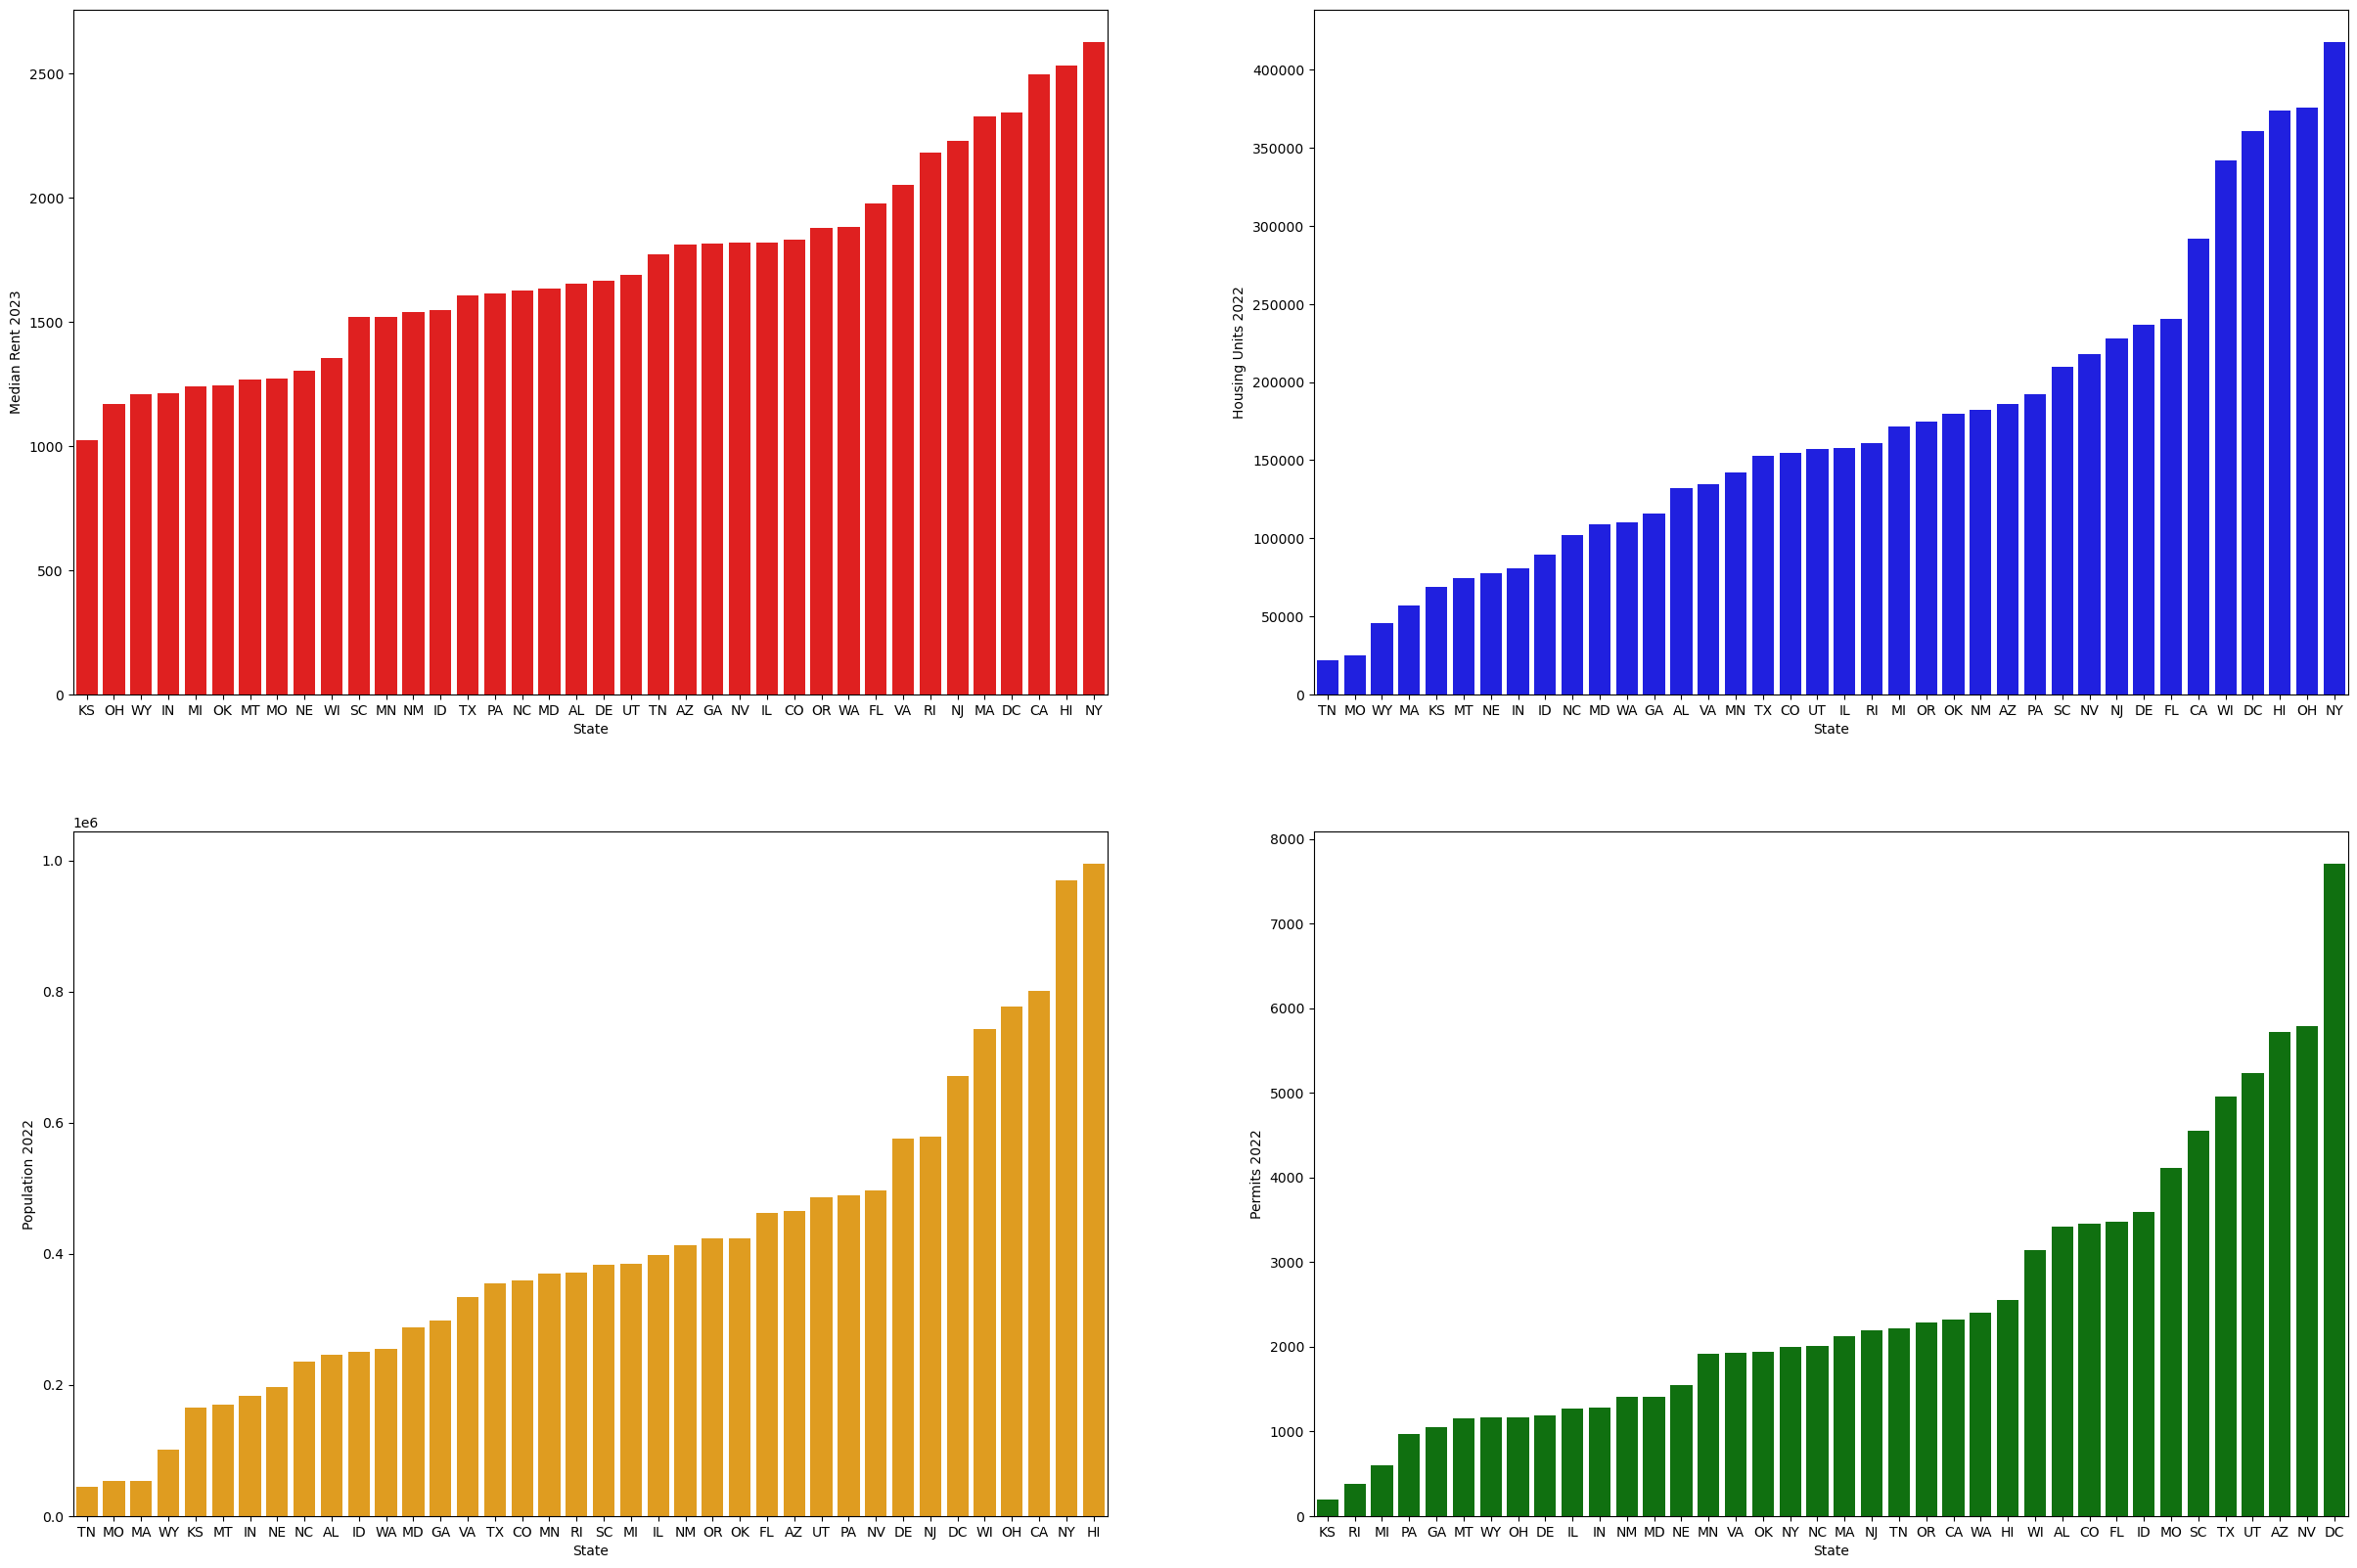

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))
sns.barplot(data=state_median_rent_2023, x='State', y='Median Rent 2023', color='red', ax=ax1, order=state_median_rent_2023.sort_values('Median Rent 2023')['State'])
sns.barplot(data=state_housingunits_2022, x='State', y='Housing Units 2022', color='blue', ax=ax2, order=state_housingunits_2022.sort_values('Housing Units 2022')['State'])
sns.barplot(data=state_population_2022, x='State', y='Population 2022', color='orange', ax=ax3, order=state_population_2022.sort_values('Population 2022')['State'])
sns.barplot(data=state_permits_2022, x='State', y='Permits 2022', color='green', ax=ax4, order=state_permits_2022.sort_values('Permits 2022')['State'])
plt.savefig('2023comparison.jpg')

# Calculating Rate of Change

In [46]:
gdf['Median Rent Change'] = gdf['Median Rent 2023'] - gdf['Median Rent 2015']
gdf['Housing Units Change'] = gdf['Housing Units 2022'] - gdf['Housing Units 2014']
gdf['Population Change'] = gdf['Population 2022'] - gdf['Population 2014']
gdf['Migration Change'] = gdf['Net Migration 2023'] - gdf['Net Migration 2015']
gdf['Permit Change'] = gdf['Permits 2022'] - gdf['Permits 2014']
gdf['Single Family Permit Change'] = gdf['Single Family Permits 2022'] - gdf['Single Family Permits 2014']
gdf['Multifamily Permit Change'] = gdf['Multifamily Permits 2022'] - gdf['Multifamily Permits 2014']

In [49]:
gdf['Median Rent Percent Change'] = ((gdf['Median Rent Change'] / gdf['Median Rent 2023']) * 100).round(1)
gdf['Housing Units Percent Change'] = ((gdf['Housing Units Change'] / gdf['Housing Units 2022']) * 100).round(1)
gdf['Population Percent Change'] = ((gdf['Population Change'] / gdf['Population 2022']) * 100).round(1)
gdf['Migration Percent Change'] = ((gdf['Migration Change'] / gdf['Net Migration 2023']) * 100).round(1)
gdf['Permit Percent Change'] = ((gdf['Permit Change'] / gdf['Permits 2022']) * 100).round(1)
gdf['Single Family Permit Percent Change'] = ((gdf['Single Family Permit Change'] / gdf['Single Family Permits 2022']) * 100).round(1)
gdf['Multifamily Permit Percent Change'] = ((gdf['Multifamily Permit Change'] / gdf['Multifamily Permits 2022']) * 100).round(1)

In [50]:
gdf.head()

,County,State,Median Rent 2015,Median Rent 2023,Housing Units 2014,Population 2014,Net Migration 2015,Housing Units 2022,Population 2022,Net Migration 2023,...,Permit Change,Single Family Permit Change,Multifamily Permit Change,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change
0,LosAngeles,CA,1778.81,2740.42,12740,154071,-938,3642047,9719765,-78649,...,8913,3667.0,5246,35.1,99.7,98.4,98.8,33.5,44.4,28.6
1,Cook,IL,1478.57,1921.00,7342,135435,2058,7538,17409,321,...,573,-424.0,997,23.0,2.6,-678.0,-541.1,6.9,-40.3,13.7
2,Harris,TX,1203.14,1565.70,13758,25419,80,14738,36257,429,...,-1273,-377.0,-896,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3
3,Maricopa,AZ,954.61,1812.31,16237,202985,2145,1877620,4555833,17396,...,21507,10772.0,10735,47.3,99.1,95.5,87.7,53.6,52.3,55.1
4,SanDiego,CA,1680.15,2842.02,708284,850424,9289,1247318,3277176,-19978,...,2471,1030.0,1441,40.9,43.2,74.1,146.5,26.4,29.3,24.7


In [51]:
changerates_gdf = gdf[['County', 'State', 'Median Rent Percent Change', 'Housing Units Percent Change', 'Population Percent Change', 'Migration Percent Change', 'Permit Percent Change', 'Single Family Permit Percent Change', 'Multifamily Permit Percent Change']]

In [53]:
changerates_gdf.head()

,County,State,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change
0,LosAngeles,CA,35.1,99.7,98.4,98.8,33.5,44.4,28.6
1,Cook,IL,23.0,2.6,-678.0,-541.1,6.9,-40.3,13.7
2,Harris,TX,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3
3,Maricopa,AZ,47.3,99.1,95.5,87.7,53.6,52.3,55.1
4,SanDiego,CA,40.9,43.2,74.1,146.5,26.4,29.3,24.7


# Exploratory Analysis 2

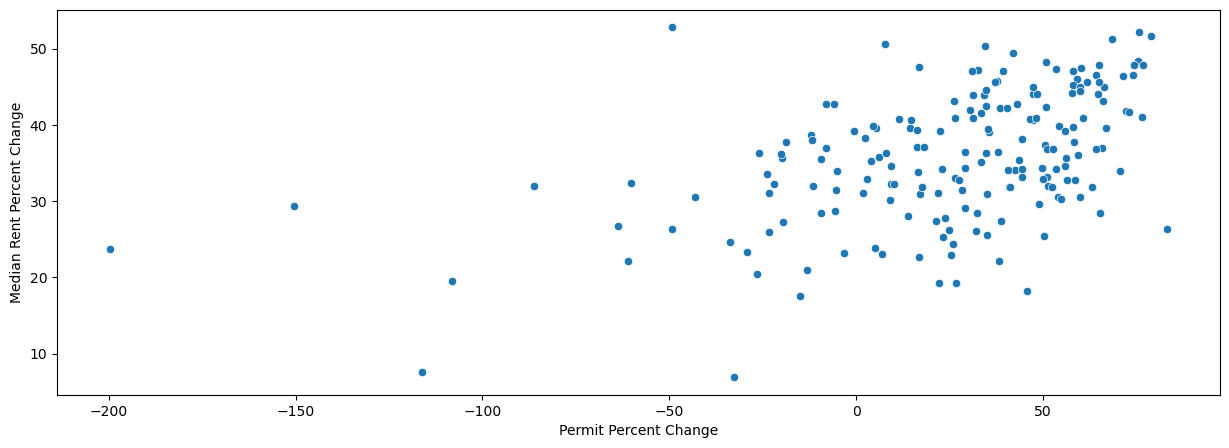

In [69]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = changerates_gdf, x = 'Permit Percent Change', y = 'Median Rent Percent Change')
plt.savefig('rentopermit_relationship.jpg')

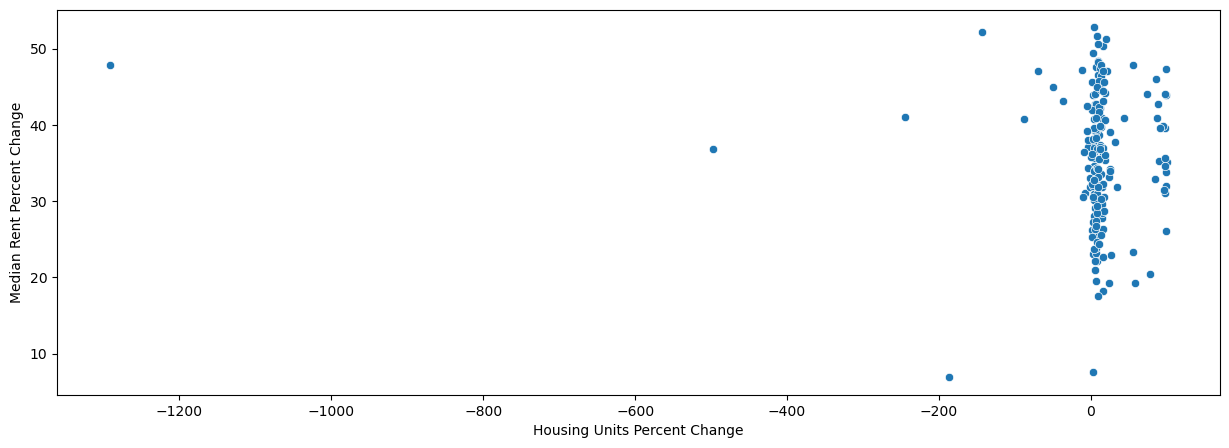

In [70]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = gdf, x = 'Housing Units Percent Change', y ='Median Rent Percent Change')
plt.savefig('rentounits_relationship.jpg')

# Data Cleaning 2

In [364]:
changerates_gdf['Median Rent Percent Change'].describe()

count    187.000000
mean      35.775936
std        8.499260
min        6.900000
25%       30.900000
50%       36.100000
75%       42.200000
max       52.800000
Name: Median Rent Percent Change, dtype: float64

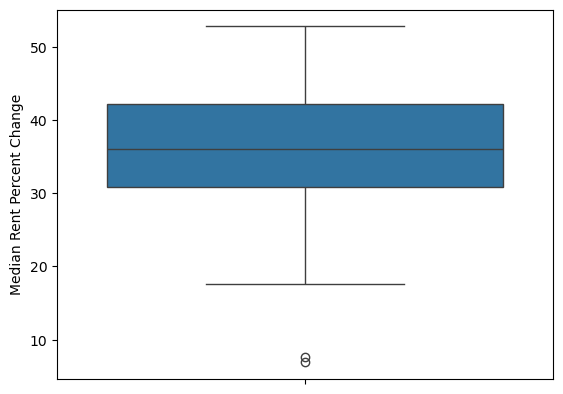

In [60]:
sns.boxplot(changerates_gdf['Median Rent Percent Change'])
plt.savefig('rentboxplot.jpg')

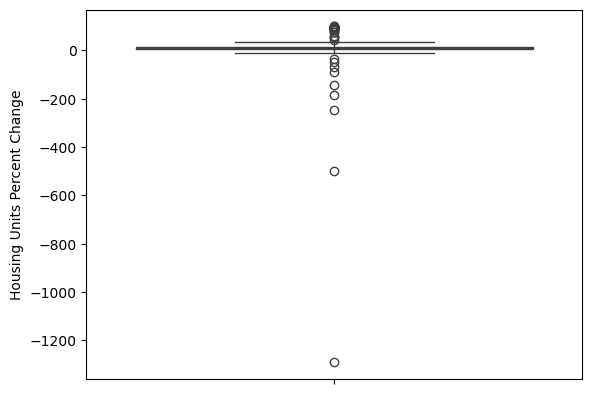

In [61]:
sns.boxplot(changerates_gdf['Housing Units Percent Change'])
plt.savefig('unitsboxplot.jpg')

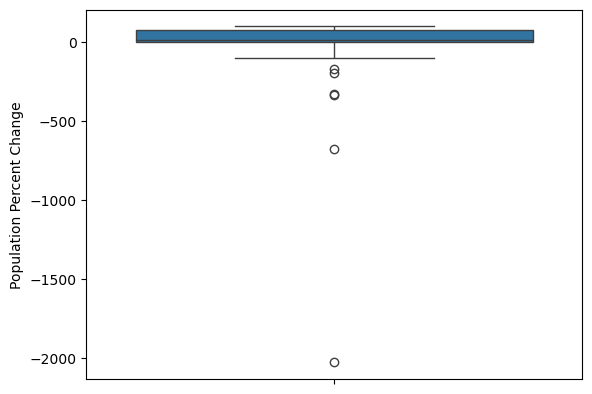

In [62]:
sns.boxplot(changerates_gdf['Population Percent Change'])
plt.savefig('populationboxplot.jpg')

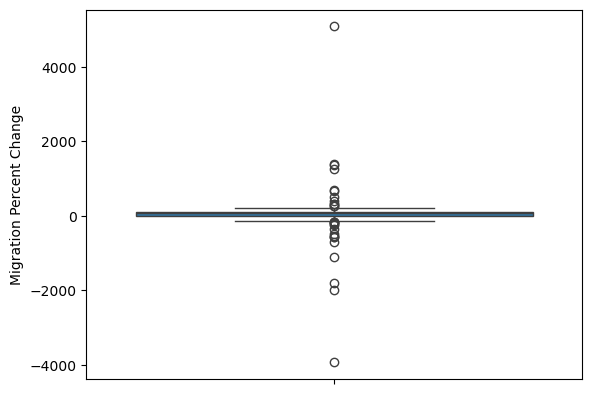

In [63]:
sns.boxplot(changerates_gdf['Migration Percent Change'])
plt.savefig('migrationboxplot.jpg')

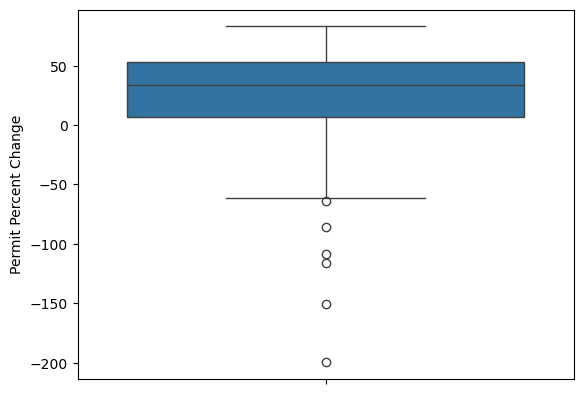

In [64]:
sns.boxplot(changerates_gdf['Permit Percent Change'])
plt.savefig('permitboxplot.jpg')

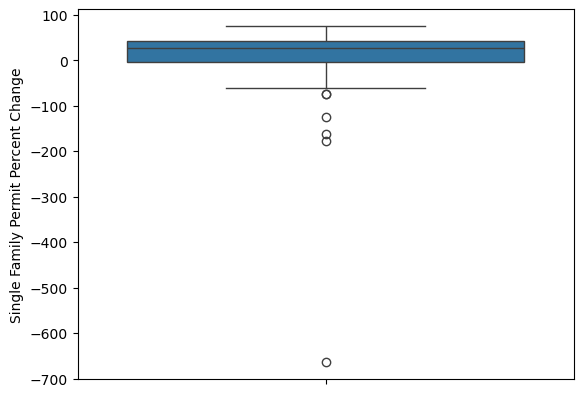

In [65]:
sns.boxplot(changerates_gdf['Single Family Permit Percent Change'])
plt.savefig('singolefamilyboxplot.jpg')

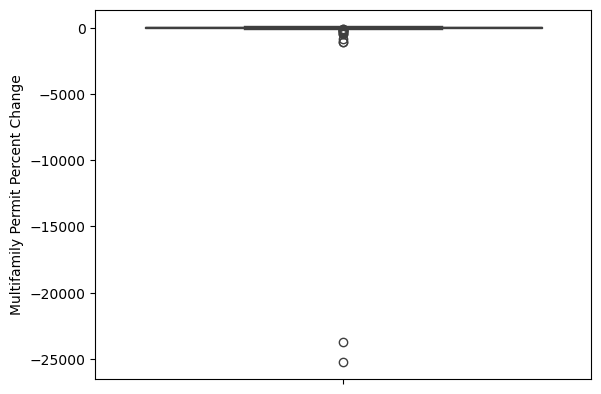

In [66]:
sns.boxplot(changerates_gdf['Multifamily Permit Percent Change'])
plt.savefig('multifamilyboxplot.jpg')

In [67]:
filtered_gdf = changerates_gdf.query('(`Median Rent Percent Change` > 10) & (`Permit Percent Change` > -100) & (`Migration Percent Change` > -500) & (`Migration Percent Change` < 2000) & (`Population Percent Change` > -100) & (`Housing Units Percent Change` > -50) & (`Single Family Permit Percent Change` > -200) & (`Multifamily Permit Percent Change` > -100)')

# Exploratory Analysis 3

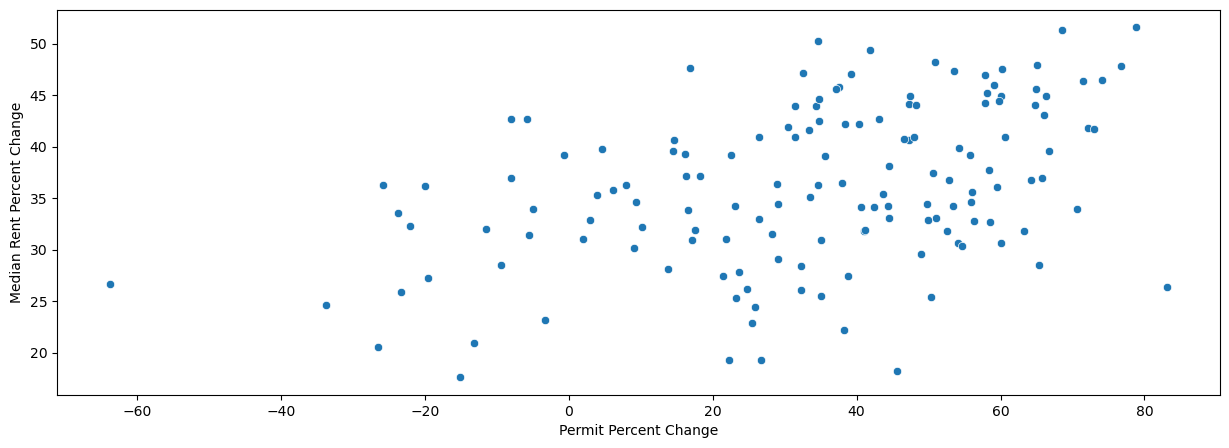

In [75]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Permit Percent Change', y = 'Median Rent Percent Change')
plt.savefig('renttopermit2.jpg')

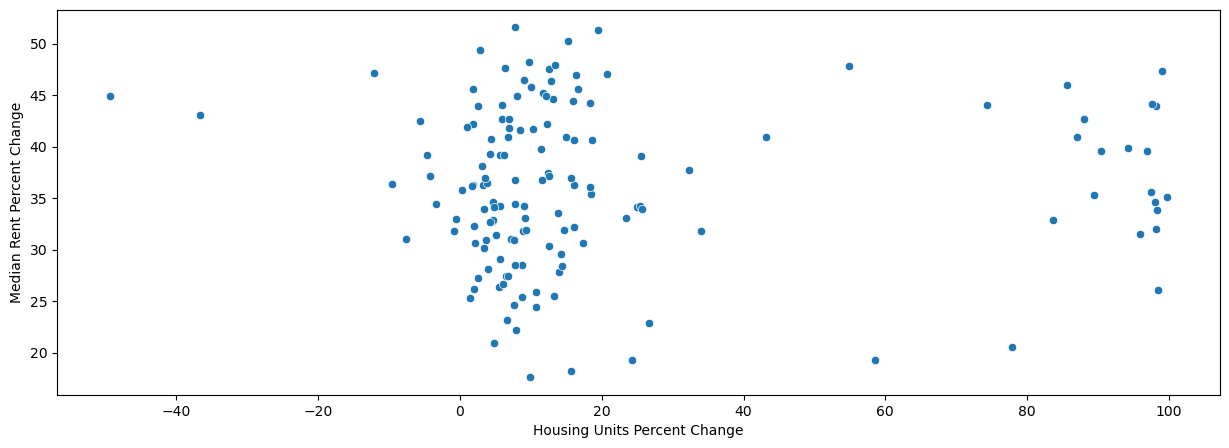

In [76]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Housing Units Percent Change', y = 'Median Rent Percent Change')
plt.savefig('renttounits2.jpg')

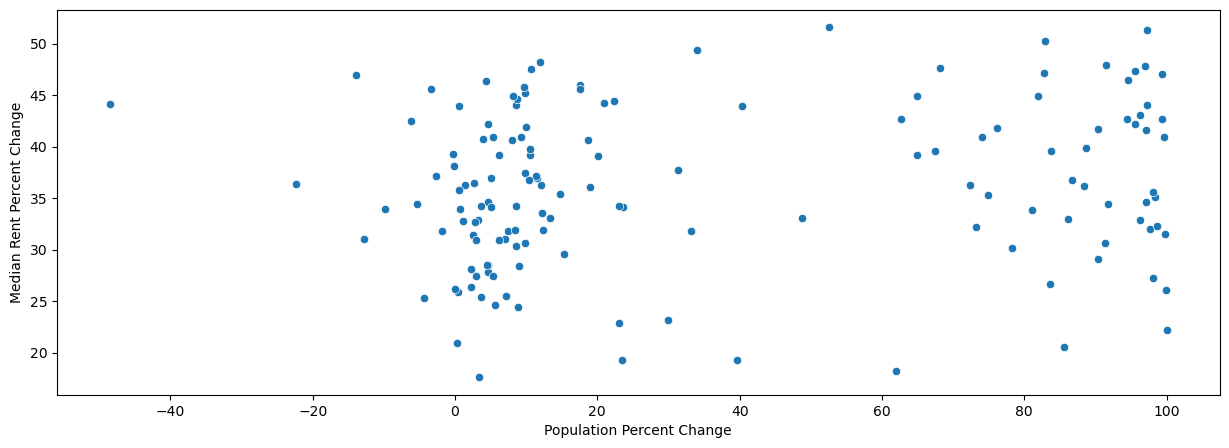

In [77]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = filtered_gdf, x = 'Population Percent Change', y = 'Median Rent Percent Change')
plt.savefig('renttopop2.jpg')

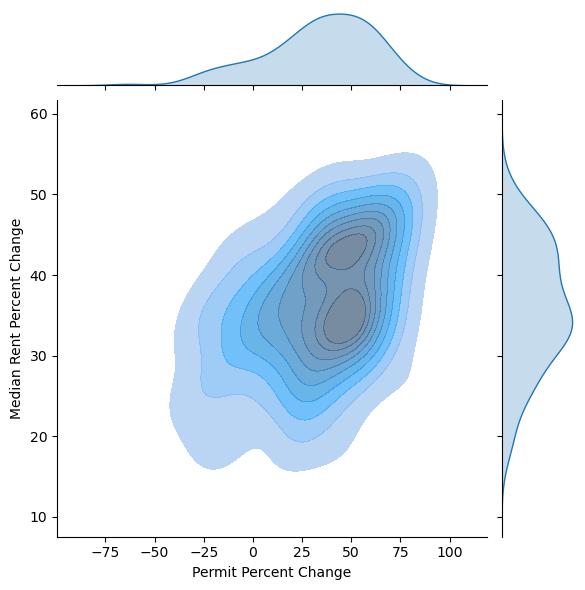

In [78]:
sns.jointplot(data = filtered_gdf, x = 'Permit Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')
plt.savefig('renttopermit3.jpg')

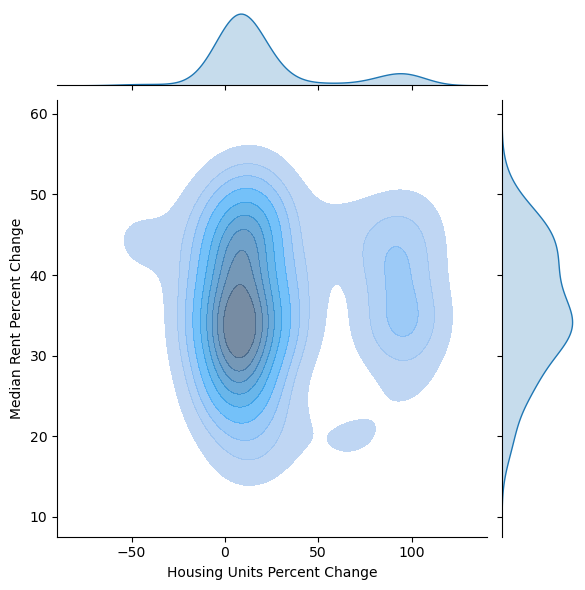

In [79]:
sns.jointplot(data = filtered_gdf, x = 'Housing Units Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')
plt.savefig('renttounits3.jpg')

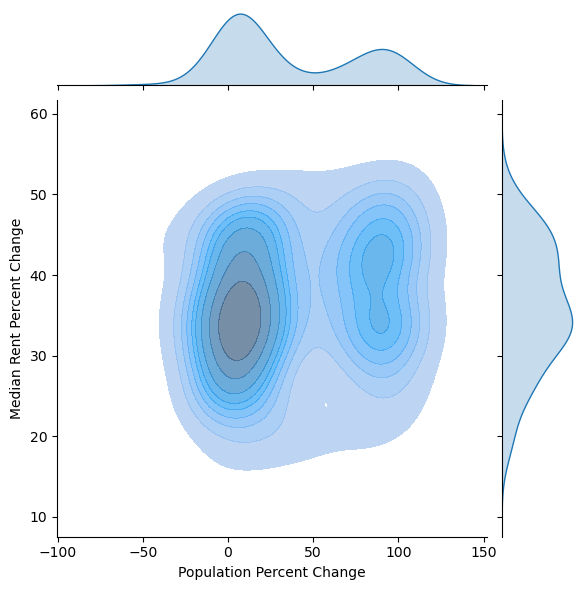

In [80]:
sns.jointplot(data = filtered_gdf, x = 'Population Percent Change', y = 'Median Rent Percent Change', kind = 'kde', alpha = 0.7, fill = 'fill')
plt.savefig('renttopop3.jpg')

# Modeling

## State

In [171]:
x = filtered_gdf['Median Rent Percent Change']
y = filtered_gdf['State']

In [172]:
formula = 'x ~ y'

In [173]:
model = smf.ols(formula, data = filtered_gdf).fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5.367
Date:                Thu, 02 May 2024   Prob (F-statistic):           6.38e-12
Time:                        14:12:16   Log-Likelihood:                -432.27
No. Observations:                 146   AIC:                             936.5
Df Residuals:                     110   BIC:                             1044.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1000      5.384      6.705      0.000      25.430      46.770
y[T.AZ]        9.2333      6.217      1.485      0.140      -3.087      21.553
y[T.CA]        1.5222      5.531      0.275      0.784      -9.440      12.484
y[T.CO]       -1.2167      5.815     -0.209      0.835     -12.741      10.308
y[T.DC]      -17.9000      7.614     -2.351      0.021     -32.989      -2.811
y[T.FL]        8.9786      5.573      1.611      0.110      -2.065      20.023
y[T.GA]        5.1500      6.019      0.856      0.394      -6.779      17.079
y[T.HI]      -13.9000      7.614     -1.826      0.071     -28.989       1.189
y[T.ID]       12.6667      6.217      2.038      0.044       0.347      24.987
y[T.IL]       -6.8600      5.898     -1.163      0.247     -18.548       4.828
y[T.IN]       -3.7000      6.217     -0.595      0.553     -16.020       8.620
y[T.KS]       -1.8500      6.594     -0.281      0.780     -14.917      11.217
y[T.MA]       -0.8000      6.217     -0.129      0.898     -13.120      11.520
y[T.MD]       -7.5250      6.019     -1.250      0.214     -19.454       4.404
y[T.MI]       -0.7400      5.898     -0.125      0.900     -12.428      10.948
y[T.MN]       -6.9333      6.217     -1.115      0.267     -19.253       5.387
y[T.MO]       -0.3000      7.614     -0.039      0.969     -15.389      14.789
y[T.MT]       -1.9000      7.614     -0.250      0.803     -16.989      13.189
y[T.NC]        3.9300      5.647      0.696      0.488      -7.260      15.120
y[T.NE]       -4.2000      7.614     -0.552      0.582     -19.289      10.889
y[T.NJ]       -3.0429      5.756     -0.529      0.598     -14.449       8.363
y[T.NM]        3.4500      6.594      0.523      0.602      -9.617      16.517
y[T.NY]       -0.3333      6.217     -0.054      0.957     -12.653      11.987
y[T.OH]       -3.1000      6.594     -0.470      0.639     -16.167       9.967
y[T.OK]       -9.8333      6.217     -1.582      0.117     -22.153       2.487
y[T.OR]        9.5000      7.614      1.248      0.215      -5.589      24.589
y[T.PA]       -5.2833      5.815     -0.909      0.366     -16.808       6.241
y[T.RI]        4.6000      7.614      0.604      0.547     -10.489      19.689
y[T.SC]        3.2667      6.217      0.525      0.600      -9.053      15.587
y[T.TN]        3.1000      7.614      0.407      0.685     -11.989      18.189
y[T.TX]       -4.3583      5.604     -0.778      0.438     -15.464       6.747
y[T.UT]        6.1750      6.019      1.026      0.307      -5.754      18.104
y[T.VA]      -11.7750      6.019     -1.956      0.053     -23.704       0.154
y[T.WA]        6.2000      5.898      1.051      0.295      -5.488      17.888
y[T.WI]       -9.2500      6.594     -1.403      0.163     -22.317       3.817
y[T.WY]       -7.6000      7.614     -0.998      0.320     -22.689       7.489
==

## Permits

In [175]:
x = filtered_gdf['Median Rent Percent Change']
y = filtered_gdf['Permit Percent Change']

In [176]:
formula = 'x ~ y'

In [177]:
model = smf.ols(formula, data = filtered_gdf).fit()

In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     31.75
Date:                Thu, 02 May 2024   Prob (F-statistic):           8.94e-08
Time:                        14:12:21   Log-Likelihood:                -490.45
No. Observations:                 146   AIC:                             984.9
Df Residuals:                     144   BIC:                             990.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1036      0.918     34.982      0.000      30.290      33.917
y              0.1197      0.021      5.634      0.000       0.078       0.162
==============================================================================
Omnibus:                        4.535   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.043
Skew:                          -0.329   Prob(JB):                        0.132
Kurtosis:                       2.518   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

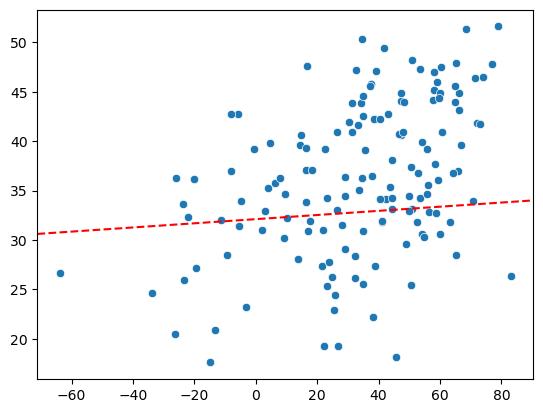

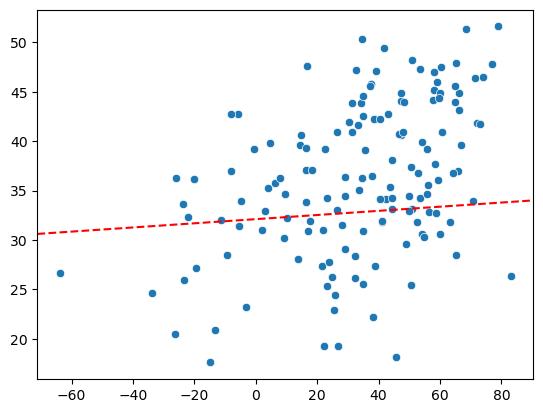

In [179]:
ax = sns.scatterplot(y = model.model.endog,
                     x = model.model.exog[:, 1])
sm.graphics.abline_plot(intercept = 32.1036, slope = 0.021, ax = ax, color = 'red', linestyle = '--')

## Housing Units

In [180]:
x1 = filtered_gdf['Median Rent Percent Change']
y1 = filtered_gdf['Housing Units Percent Change']

In [181]:
formula1 = 'x1 ~ y1'

In [182]:
model1 = smf.ols(formula1, data = filtered_gdf).fit()

In [183]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1134
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.737
Time:                        14:12:27   Log-Likelihood:                -504.93
No. Observations:                 146   AIC:                             1014.
Df Residuals:                     144   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9656      0.771     46.625      0.000      34.441      37.490
y1             0.0070      0.021      0.337      0.737      -0.034       0.048
==============================================================================
Omnibus:                        3.884   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.836
Skew:                          -0.193   Prob(JB):                        0.242
Kurtosis:                       2.437   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

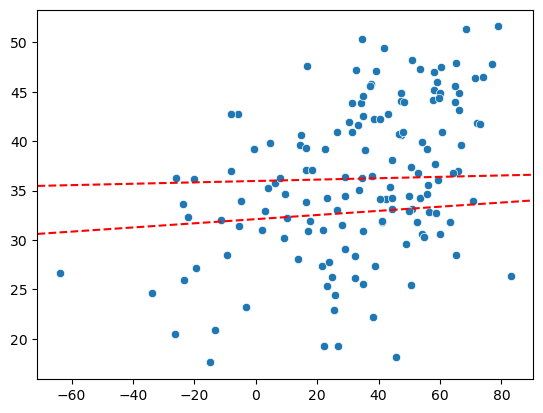

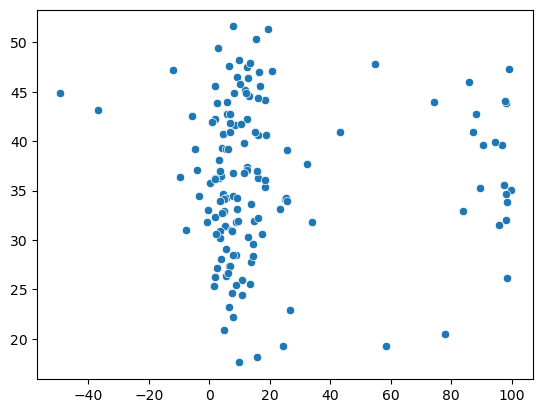

In [184]:
ax1 = sns.scatterplot(y = model1.model.endog,
                     x = model1.model.exog[:, 1])
sm.graphics.abline_plot(intercept = 35.9656, slope = 0.0070, ax = ax, color = 'red', linestyle = '--')

## Population

In [185]:
x2 = filtered_gdf['Median Rent Percent Change']
y2 = filtered_gdf['Population Percent Change']

In [186]:
formula2 = 'x2 ~ y2'

In [187]:
model2 = smf.ols(formula2, data = filtered_gdf).fit()

In [188]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x2   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.655
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0579
Time:                        14:12:31   Log-Likelihood:                -503.16
No. Observations:                 146   AIC:                             1010.
Df Residuals:                     144   BIC:                             1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0199      0.852     41.107      0.000      33.336      36.704
y2             0.0306      0.016      1.912      0.058      -0.001       0.062
==============================================================================
Omnibus:                        3.886   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.149
Skew:                          -0.247   Prob(JB):                        0.207
Kurtosis:                       2.477   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Migration

In [189]:
x3 = filtered_gdf['Median Rent Percent Change']
y3 = filtered_gdf['Migration Percent Change']

In [190]:
formula3 = 'x3 ~ y3'

In [191]:
model3 = smf.ols(formula3, data = filtered_gdf).fit()

In [192]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.02086
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.885
Time:                        14:12:35   Log-Likelihood:                -504.98
No. Observations:                 146   AIC:                             1014.
Df Residuals:                     144   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0724      0.692     52.109      0.000      34.704      37.441
y3             0.0005      0.003      0.144      0.885      -0.006       0.007
==============================================================================
Omnibus:                        4.064   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                2.904
Skew:                          -0.192   Prob(JB):                        0.234
Kurtosis:                       2.425   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Piecewise Regression

## Permit

In [193]:
x = filtered_gdf['Permit Percent Change'].values
y = filtered_gdf['Median Rent Percent Change'].values

In [194]:
pw_reg = pwr.Fit(x, y, n_breakpoints = 1)

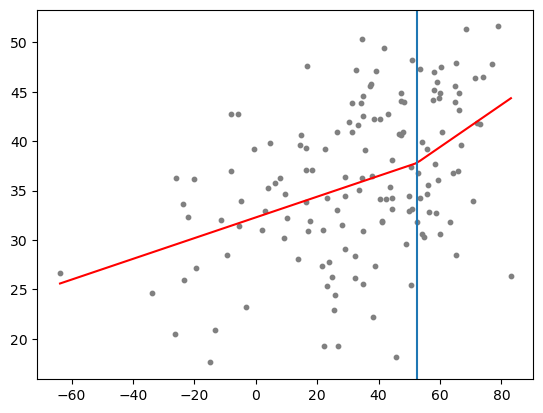

In [195]:
pw_reg.plot_data(color = 'grey', s = 10)
pw_reg.plot_fit(color = 'red')
pw_reg.plot_breakpoints()
plt.savefig('piecewisepermits.jpg')

In [196]:
pw_reg.summary()


                    Breakpoint Regression Results                     
No. Observations                      146
No. Model Parameters                    4
Degrees of Freedom                    142
Res. Sum of Squares                7031.4
Total Sum of Squares              8633.71
R Squared                        0.185588
Adjusted R Squared               0.162485
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                32.2824        0.943       34.237      1.73e-70       30.418       34.146
alpha1               0.10487       0.0287       3.6523      0.000365     0.048109      0.16163
beta1               0.109027        0.161      0.67566             -     -0.20996      0.42801
breakpoint1          52.4201         21.8            -             -        9.303       95.537
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      146\nNo. Model Parameters                    4\nDegrees of Freedom                    142\nRes. Sum of Squares                7031.4\nTotal Sum of Squares              8633.71\nR Squared                        0.185588\nAdjusted R Squared               0.162485\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                32.2824        0.943       34.237      1.73e-70       30.

## Housing Units

In [197]:
x1 = filtered_gdf['Housing Units Percent Change'].values
y1 = filtered_gdf['Median Rent Percent Change'].values

In [198]:
pw_reg1 = pwr.Fit(x1, y1, n_breakpoints = 1)

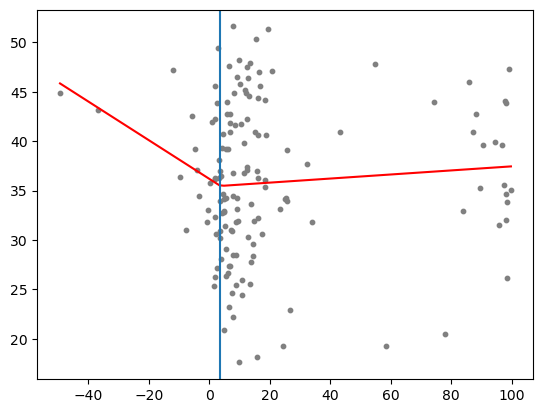

In [199]:
pw_reg1.plot_data(color = 'grey', s = 10)
pw_reg1.plot_fit(color = 'red')
pw_reg1.plot_breakpoints()
plt.savefig('piecewiseunits.jpg')

In [200]:
pw_reg1.summary()


                    Breakpoint Regression Results                     
No. Observations                      146
No. Model Parameters                    4
Degrees of Freedom                    142
Res. Sum of Squares               8415.59
Total Sum of Squares              8633.71
R Squared                        0.025265
Adjusted R Squared              -0.002387
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                36.1746         1.52        23.85      1.62e-51       33.176       39.173
alpha1             -0.195597        0.123      -1.5914         0.114     -0.43856     0.047364
beta1               0.216175        0.125       1.7296             -    -0.030897      0.46325
breakpoint1          3.63625         8.84            -             -      -13.845       21.117
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      146\nNo. Model Parameters                    4\nDegrees of Freedom                    142\nRes. Sum of Squares               8415.59\nTotal Sum of Squares              8633.71\nR Squared                        0.025265\nAdjusted R Squared              -0.002387\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                36.1746         1.52        23.85      1.62e-51       33.

## Population

In [201]:
x2 = filtered_gdf['Population Percent Change'].values
y2 = filtered_gdf['Median Rent Percent Change'].values

In [202]:
pw_reg2 = pwr.Fit(x2, y2, n_breakpoints = 1)

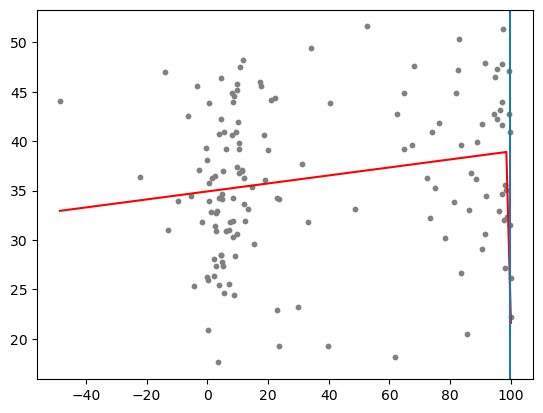

In [203]:
pw_reg2.plot_data(color = 'grey', s = 10)
pw_reg2.plot_fit(color = 'red')
pw_reg2.plot_breakpoints()
plt.savefig('piecewisepopulation.jpg')

In [204]:
pw_reg2.summary()


                    Breakpoint Regression Results                     
No. Observations                      146
No. Model Parameters                    4
Degrees of Freedom                    142
Res. Sum of Squares               7959.25
Total Sum of Squares              8633.71
R Squared                        0.078120
Adjusted R Squared               0.051967
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                34.9079        0.836       41.776      1.18e-81       33.256        36.56
alpha1             0.0405005       0.0163        2.486        0.0141    0.0082951     0.072706
beta1               -42.8405         23.7      -1.8095             -      -89.642       3.9607
breakpoint1          99.5952        0.146            -             -       99.307       99.884
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      146\nNo. Model Parameters                    4\nDegrees of Freedom                    142\nRes. Sum of Squares               7959.25\nTotal Sum of Squares              8633.71\nR Squared                        0.078120\nAdjusted R Squared               0.051967\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                34.9079        0.836       41.776      1.18e-81       33.

## Migration

In [205]:
x3 = filtered_gdf['Migration Percent Change'].values
y3 = filtered_gdf['Median Rent Percent Change'].values

In [208]:
pw_reg3 = pwr.Fit(x3, y3, n_breakpoints = 2)

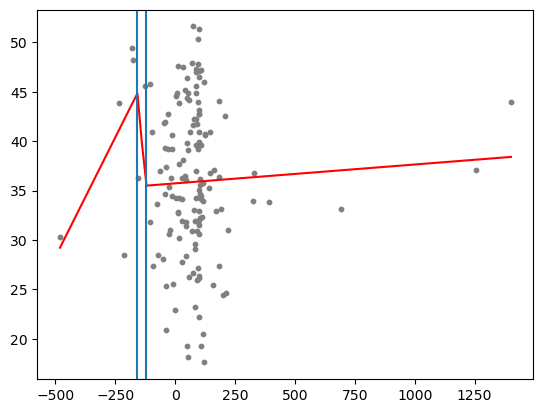

In [209]:
pw_reg3.plot_data(color = 'grey', s = 10)
pw_reg3.plot_fit(color = 'red')
pw_reg3.plot_breakpoints()
plt.savefig('piecewisemigration.jpg')

In [210]:
pw_reg3.summary()


                    Breakpoint Regression Results                     
No. Observations                      146
No. Model Parameters                    6
Degrees of Freedom                    140
Res. Sum of Squares                8438.6
Total Sum of Squares              8633.71
R Squared                        0.022599
Adjusted R Squared              -0.019591
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                52.4712         8.46       6.2037      5.85e-09       35.749       69.193
alpha1             0.0483903       0.0301       1.6064          0.11    -0.011167      0.10795
beta1               0.271197        0.375      0.72282             -     -0.47058        1.013
beta2              -0.317678        0.374      -0.8494             -      -1.0571      0.42174
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      146\nNo. Model Parameters                    6\nDegrees of Freedom                    140\nRes. Sum of Squares                8438.6\nTotal Sum of Squares              8633.71\nR Squared                        0.022599\nAdjusted R Squared              -0.019591\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                52.4712         8.46       6.2037      5.85e-09       35.

# New Features

## Permit Break Points

In [211]:
estimates = pw_reg.get_results()['estimates']

In [212]:
breakpoints = [estimates[i]['estimate'] for i in estimates if 'breakpoint' in i]

In [213]:
[estimates[i]['estimate'] for i in estimates if 'breakpoint' in i]

[52.42011139019365]

In [214]:
def create_permit_categories(x, breakpoints):
    if x < breakpoints[0]:
        return "first_half"
    elif x >= breakpoints[0]:
        return "second_half"

In [215]:
filtered_gdf['Permit Breaks'] = filtered_gdf['Permit Percent Change'].apply(lambda x: create_permit_categories(x, breakpoints))

C:\Users\Samira\AppData\Local\Temp\ipykernel_22372\2105985522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdf['Permit Breaks'] = filtered_gdf['Permit Percent Change'].apply(lambda x: create_permit_categories(x, breakpoints))


## Housing Units Break Points

In [216]:
estimates1 = pw_reg1.get_results()['estimates']

In [217]:
breakpoints1 = [estimates1[i]['estimate'] for i in estimates1 if 'breakpoint' in i]

In [218]:
[estimates1[i]['estimate'] for i in estimates1 if 'breakpoint' in i]

[3.636251767245547]

In [219]:
def create_housingunits_categories(x1, breakpoints1):
    if x1 < breakpoints1[0]:
        return "first_half"
    elif x1 >= breakpoints1[0]:
        return "second_half"

In [220]:
filtered_gdf['Housing Units Breaks'] = filtered_gdf['Housing Units Percent Change'].apply(lambda x1: create_housingunits_categories(x1, breakpoints1))

C:\Users\Samira\AppData\Local\Temp\ipykernel_22372\3289793048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdf['Housing Units Breaks'] = filtered_gdf['Housing Units Percent Change'].apply(lambda x1: create_housingunits_categories(x1, breakpoints1))


## Migration Breaks

In [221]:
estimates3 = pw_reg3.get_results()['estimates']

In [222]:
breakpoints3 = [estimates3[i]['estimate'] for i in estimates3 if 'breakpoint' in i]

In [223]:
[estimates3[i]['estimate'] for i in estimates3 if 'breakpoint' in i]

[-122.79256409147146, -157.54548541172989]

In [224]:
def create_migration_categories(x3, breakpoints3):
    if x3 < breakpoints3[0]:
        return "first_half"
    elif x3 >= breakpoints3[0]:
        return "second_half"

In [225]:
filtered_gdf['Migration Breaks'] = filtered_gdf['Migration Percent Change'].apply(lambda x3: create_migration_categories(x3, breakpoints3))

C:\Users\Samira\AppData\Local\Temp\ipykernel_22372\67413735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdf['Migration Breaks'] = filtered_gdf['Migration Percent Change'].apply(lambda x3: create_migration_categories(x3, breakpoints3))


## Median Rent Break Points

In [226]:
rent = filtered_gdf['Median Rent Percent Change']

In [227]:
def rent_change(rent):
    if rent <= -20:
        return 'lowoer'
    elif -20 < rent <= 40:
        return 'middle'
    else:
        return 'upper'

In [228]:
def add_rent_category(df):
    filtered_gdf['Rent Breaks'] = filtered_gdf['Median Rent Percent Change'].apply(rent_change)
    return filtered_gdf

In [229]:
filtered_gdf = add_rent_category(filtered_gdf)

C:\Users\Samira\AppData\Local\Temp\ipykernel_22372\1437945286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdf['Rent Breaks'] = filtered_gdf['Median Rent Percent Change'].apply(rent_change)


In [230]:
filtered_gdf

,County,State,Median Rent Percent Change,Housing Units Percent Change,Population Percent Change,Migration Percent Change,Permit Percent Change,Single Family Permit Percent Change,Multifamily Permit Percent Change,Permit Breaks,Housing Units Breaks,Migration Breaks,Rent Breaks
0,LosAngeles,CA,35.1,99.7,98.4,98.8,33.5,44.4,28.6,first_half,second_half,second_half,middle
2,Harris,TX,23.2,6.6,29.9,81.4,-3.3,-2.1,-4.3,first_half,second_half,second_half,middle
3,Maricopa,AZ,47.3,99.1,95.5,87.7,53.6,52.3,55.1,second_half,second_half,second_half,upper
4,SanDiego,CA,40.9,43.2,74.1,146.5,26.4,29.3,24.7,first_half,second_half,second_half,upper
5,Miami-Dade,FL,41.6,8.5,97.1,74.0,33.4,15.1,38.3,first_half,second_half,second_half,upper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Bonneville,ID,47.9,13.4,91.5,70.7,65.1,58.7,95.9,second_half,second_half,second_half,upper
180,Wicomico,MD,32.7,4.3,2.8,10.7,58.6,37.1,75.4,second_half,second_half,second_half,middle
181,Laramie,WY,28.5,7.7,4.5,-213.2,65.3,18.7,87.6,second_half,second_half,first_half,middle
183,Barrow,GA,47.0,16.3,-13.9,88.7,57.9,59.4,45.3,second_half,second_half,second_half,upper


# Updated Model

In [231]:
a = filtered_gdf['Median Rent Percent Change']
b = filtered_gdf['Permit Percent Change']
c = filtered_gdf['Housing Units Percent Change']
d = filtered_gdf['Population Percent Change']

In [232]:
formula4 = 'a ~ b * c * d'

In [233]:
model4 = smf.ols(formula4, data = filtered_gdf).fit()

In [234]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     6.155
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.83e-06
Time:                        14:13:38   Log-Likelihood:                -485.16
No. Observations:                 146   AIC:                             986.3
Df Residuals:                     138   BIC:                             1010.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4553      1.728     18.783      0.000      29.039      35.872
b              0.0649      0.043      1.525      0.129      -0.019       0.149
c             -0.1704      0.157     -1.084      0.280      -0.481       0.140
b:c            0.0046      0.003      1.363      0.175      -0.002       0.011
d              0.0310      0.028      1.112      0.268      -0.024       0.086
b:d            0.0006      0.001      0.935      0.352      -0.001       0.002
c:d            0.0014      0.002      0.753      0.453      -0.002       0.005
b:c:d      -4.558e-05    3.9e-05     -1.168      0.245      -0.000    3.16e-05
==============================================================================
Omnibus:                        3.812   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.808
Skew:                          -0.359   Prob(JB):                        0.149
Kurtosis:                       2.666   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
a = filtered_gdf['Median Rent Percent Change']
b = filtered_gdf['Permit Percent Change']
c = filtered_gdf['Housing Units Percent Change']
d = filtered_gdf['Population Percent Change']
e = filtered_gdf['Housing Units Breaks']
f = filtered_gdf['Permit Breaks']
g = filtered_gdf['Migration Breaks']
h = filtered_gdf['Rent Breaks']

In [236]:
formula5 = 'a ~ b * c * d * e * f * g * h'

In [237]:
model5 = smf.ols(formula5, data = filtered_gdf).fit()

In [238]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4.748
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.48e-11
Time:                        14:13:45   Log-Likelihood:                -405.61
No. Observations:                 146   AIC:                             923.2
Df Residuals:                      90   BIC:                             1090.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              17.1243      1.314     13.027      0.000      14.513      19.736
e[T.second_half]                                                       -1.7099      1.684     -1.016      0.313      -5.055       1.635
f[T.second_half]                                                        6.7023      5.016      1.336      0.185      -3.263      16.667
g[T.second_half]                                                       17.1208      1.315     13.024      0.000      14.509      19.732
h[T.upper]                                                              2.7946      3.292      0.849      0.398      -3.746       9.336
e[T.second_half]:f[T.second_half]                                       6.7023      5.016      1.336      0.185      -3.263      16.667
e[T.second_half]:g[T.second_half]                                      -1.7097      1.684     -1.016      0.313      -5.054       1.635
f[T.second_half]:g[T.second_half]                                       6.7024      5.016      1.336      0.185      -3.263      16.667
e[T.second_half]:h[T.upper]                                             2.7885      3.293      0.847      0.399      -3.753       9.330
f[T.second_half]:h[T.upper]                                           -13.7353     21.420     -0.641      0.523     -56.290      28.820
g[T.second_half]:h[T.upper]                                             2.7912      3.293      0.848      0.399      -3.750       9.333
e[T.second_half]:f[T.second_half]:g[T.second_half]                      6.7024      5.016      1.336      0.185      -3.263      16.667
e[T.second_half]:f[T.second_half]:h[T.upper]                          -13.7353     21.420     -0.641      0.523     -56.290      28.820
e[T.second_half]:g[T.second_half]:h[T.upper]                            2.7886      3.293      0.847      0.399      -3.753       9.330
f[T.second_half]:g[T.second_half]:h[T.upper]                          -13.7353     21.420     -0.641      0.523     -56.290      28.820
e[T.second_half]:f[T.second_half]:g[T.second_half]:h[T.upper]         -13.7353     21.420     -0.641      0.523     -56.290      28.820
b                                                                       0.0187      0.047      0.400      0.690      -0.074       0.112
b:e[T.second_half]                                                      0.0687      0.059      1.169      0.245      -0.048       0.185
b:f[T.second_half]                                                     -0.1402      0.082     -1.704      0.092      -0.304       0.023
b:g[T.second_half]                                                     -0.0814      0.046  